# **HMDA Data Analysis**
## Independent Study
### *Carter Hanford*
#### *November 11th, 2020*

This is the jupyter notebook for the redlining & policing analysis from an independent study conducted in Fall 2020. In this notebook, we'll apply a machine learning logistic regression algorithm to data from the Home Mortgage Disclosure Act (*more on that below*) to examine the prevalence of racial bias in the housing loan market.
### **Introduction**

As a research assistant in the *Department of Sociology & Anthropology* at Saint Louis University, I work with Dr. Christopher Prener on a research project examining [***historical redlining in St. Louis***](https://www.stlmag.com/news/the-color-line-race-in-st.-louis/) and it's affects on contemporary communities and neighborhoods. The practice of refusing/denying loans to neighborhoods deemed "financially dangerous" disproportionally impacted Black communities and is one of the primary drivers of racial inequality and segregation in contemporary cities like St. Louis.

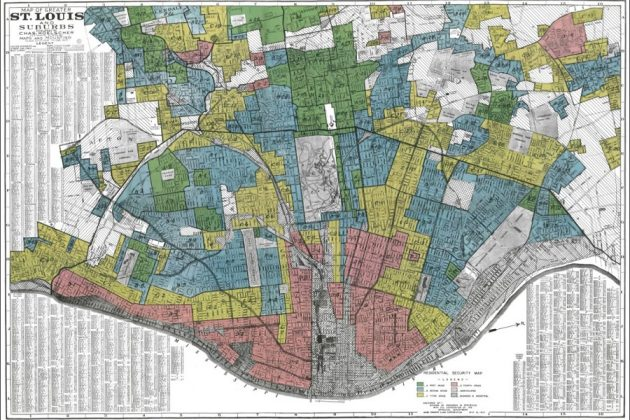

### **Notebook Outline**

This notebook utilizes financial data to answer the research question; 
- ***Does racial discrimination exist within the contemporary housing market***?

The dataset comes from Consumer Financial Protection Bureau. This data set, called "**HMDA**" data, is data collected via the *Home Mortgage Disclosure Act* enacted by Congress in 1975 and requires financial institutions to disclose loan-level information about mortgages. This dataset is robust and includes many variables to examine, while also being very clean. In this project, we'll be focusing on data from 2017 only and applying a machine learning algorithm to the dataset.

Building off of the research question, we're looking for a variable that can answer this question based on the financial data on home loans. In the 2017 dataset, the column ***'action_taken_name'*** represents the variable we want to be our *label* (independent variable) for the algorithm. HMDA data is *individual-level* which means that each row represents an anonymous person. Thus, our label indicates whether or not that individual was;
- ***Denied by the financial institution***
- ***Approved from the financial institution***

These are only two of the seven label types in our independent variable, but for simplicity we'll simply keep the label as binary (*yes/no*). Financial data can be complicated, and many of the other labels stray away from our original research question and can make the results more convoluted than necessary. 

For example, two other labels in our independent variable are;
- ***Application withdrawn by applicant***
- ***Application approved but not accepted***

Because of the other features in this dataset, reasons for why applications are approved but not accepted or withdrawn by the applicant simply **cannot** be answered. We would need more information to make a reasonable case as to why these outcomes happened in the first place. Thus, it makes more sense to simply remove these from possible outcomes. 

Mentioned previously in the introduction, most social science research that uses statistical modeling implements a basic form of ***OLS Linear Regression***, i.e. what social indicators influence a target variable of our choice?

However, since we ultimately want to predict the ***probability*** that a loan was accepted or denied by the financial institution, a general OLS Regression model probably isn't our best approach. Recall that when predicting a probability, we want to predict the the continuous probability (0,1) that an instance belongs to a particular class. Thus, **Logistic Regression** makes the most sense for our model since our output variable is binary (*yes/no*), where we utilize selected features from our dataset to help answer the research question.


***

So how do we turn this workflow into a worflow using machine learning techniques? What are the advantages of using a machine learning approach in social science research? As [**this article**](https://healthcare.ai/machine-learning-versus-statistics-use/#:~:text=If%20you%20want%20predictive%20accuracy,model%20may%20be%20more%20appropriate) concisely puts it, machine learning models are designed to make the most accurate predictions possible. In social science research, where generalization outside of the sample size is **very important**, accurate predictions allow us to make stronger arguments for the social trends we're seeing.

Thus, in this project we'll implement a logistic regression machine learning model on the HMDA data to examine racial discrimination within the contemporary home-loan market. Our workflow will look like this:

Where our:
- ***Feature*** - represents a matrix of D-dimensional vectors (independent variables)
- ***Weight*** - represents the learnable paramaters of the model
- ***Bias*** - represents an additional input layer that essentially guarantees that when all inputs are zero there will still be an activation
- ***Activation Function*** - represents the sigmoid function which the algorithm will try to minimize 
- ***P(Class|X)*** represents our predicted class, i.e. whether the loan was accepted or denied***

***

### **Data Loading & Pre-Processing**

In this section we'll load in the HMDA data and perform some pre-processing to get it ready for the logistic regression machine learning algorithm.

Let's start by setting the workspace directory. For this project I use google drive to store a copy of the data which we can easily load into google.colab using a drive mount:

In [ ]:
# import google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set working directory
%cd /content/drive/'My Drive'/Data

/content/drive/My Drive/Data


Now the my google drive is mounted in the notebook and the working directory is set, we can load in the HMDA data from 2017. The nice thing about this dataset is that it provides a cateogorical column and its corresponding numerical column. This is nice because it can save us a coding step and we may not have to implement one-hot encoding.

In [ ]:
# read in data
import pandas as pd
data = pd.read_csv('hmda17_clean.csv')
data.head(5)

,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,action_taken_name,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,co_applicant_race_name_1,co_applicant_race_1,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,denial_reason_name_1,denial_reason_1
0,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,265,Loan originated,2185.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,No co-applicant,8,Male,1,No co-applicant,5,NaN,NaN
1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,247,Loan originated,2152.31,Not Hispanic or Latino,2,Not Hispanic or Latino,2,White,5,White,5,Male,1,Female,2,NaN,NaN
2,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,267,Loan originated,2182.01,Not Hispanic or Latino,2,Not Hispanic or Latino,2,White,5,White,5,Male,1,Female,2,NaN,NaN
3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Not owner-occupied as a principal dwelling,2,43,Application approved but not accepted,1268.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,No co-applicant,8,Male,1,No co-applicant,5,NaN,NaN
4,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,167,Loan purchased by the institution,2213.32,Not applicable,4,Not applicable,4,Not applicable,7,Not applicable,7,Not applicable,4,Not applicable,4,NaN,NaN


In [ ]:
# columns
data.columns

Index(['loan_type_name', 'loan_type', 'property_type_name', 'property_type',
       'loan_purpose_name', 'loan_purpose', 'owner_occupancy_name',
       'owner_occupancy', 'loan_amount_000s', 'action_taken_name',
       'census_tract_number', 'applicant_ethnicity_name',
       'applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1',
       'co_applicant_race_name_1', 'co_applicant_race_1', 'applicant_sex_name',
       'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex',
       'denial_reason_name_1', 'denial_reason_1'],
      dtype='object')

Overall, this is a large dataset with 25 columns and 87,602 samples. We'll be cutting this down quite a bit based on what features we need for the algorithm. The column ***'action_taken_name'*** is the label, and we will use the following features for the algorithm:
- applicant_race
- applicant_sex
- property_type_name
- loan_purpose_name

In [ ]:
# drop features
data_sub = data.filter(items=['applicant_race', 'property_type_name', 'loan_purpose_name', 'action_taken_name', 'applicant_race_name_1', 'applicant_sex_name'])
data_sub.head(30)

,property_type_name,loan_purpose_name,action_taken_name,applicant_race_name_1,applicant_sex_name
0,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Male
1,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Male
2,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Male
3,One-to-four family dwelling (other than manufa...,Refinancing,Application approved but not accepted,White,Male
4,One-to-four family dwelling (other than manufa...,Refinancing,Loan purchased by the institution,Not applicable,Not applicable
5,One-to-four family dwelling (other than manufa...,Home purchase,Loan originated,White,Male
6,One-to-four family dwelling (other than manufa...,Home purchase,Application withdrawn by applicant,Black or African American,Male
7,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Male
8,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,Black or African American,Female
9,One-to-four family dwelling (other than manufa...,Home improvement,Loan purchased by the institution,White,Male


Now let's filter the dataset to only include the two outcomes we want in the label, application denied or accepted.

In [ ]:
# query label
data_yes = data_sub.query('action_taken_name == "Loan originated"')
data_no = data_sub.query('action_taken_name == "Application denied by financial institution"')

# combine dataframes
frames = [data_yes, data_no]

# check & shuffle
from sklearn.utils import shuffle
hmda = pd.concat(frames)
hmda = shuffle(hmda)

hmda.head(10)

,property_type_name,loan_purpose_name,action_taken_name,applicant_race_name_1,applicant_sex_name
54980,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Male
30210,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,..."
87296,One-to-four family dwelling (other than manufa...,Refinancing,Application denied by financial institution,White,Male
5707,One-to-four family dwelling (other than manufa...,Home purchase,Loan originated,White,Male
30664,One-to-four family dwelling (other than manufa...,Home improvement,Application denied by financial institution,White,Male
61701,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Female
58293,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,..."
38844,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,"Information not provided by applicant in mail,...",Female
38603,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Female
4265,One-to-four family dwelling (other than manufa...,Refinancing,Application denied by financial institution,White,Female


Historically, redlining has been a black and white issue as well, which is what our research focuses on since the neighborhoods and communities damaged the most in St. Louis were primarily black occupied.

For this reason, we'll filter the race column to only include black and white residents.

In [ ]:
# query label
data_black = hmda.query('applicant_race_name_1 == "Black or African American"')
data_white = hmda.query('applicant_race_name_1 == "White"')

# combine dataframes
frames_race = [data_black, data_white]

# check & shuffle
from sklearn.utils import shuffle
hmda_race = pd.concat(frames_race)
hmda_race = shuffle(hmda_race)

hmda_race

,property_type_name,loan_purpose_name,action_taken_name,applicant_race_name_1,applicant_sex_name
5046,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Female
40914,One-to-four family dwelling (other than manufa...,Home purchase,Loan originated,White,Female
3583,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Female
38034,One-to-four family dwelling (other than manufa...,Refinancing,Loan originated,White,Male
28544,One-to-four family dwelling (other than manufa...,Refinancing,Application denied by financial institution,White,Female
...,...,...,...,...,...
32244,One-to-four family dwelling (other than manufa...,Home purchase,Loan originated,White,Male
64183,One-to-four family dwelling (other than manufa...,Home purchase,Loan originated,White,Male
21400,One-to-four family dwelling (other than manufa...,Refinancing,Application denied by financial institution,White,Male
13936,One-to-four family dwelling (other than manufa...,Home purchase,Loan originated,White,Male


In [ ]:
# drop sex value
hmda_race.drop(hmda_race[hmda_race['applicant_sex_name'] == "Information not provided by applicant in mail, Internet, or telephone application"].index, inplace = True) 

Now let's take note of unique names within each column. The next step is to convert everything to numerical data, so let's make sure we have documentation on what each number will represent:

#### **Property Type**
- 0 = One-to-four family dwelling (other than manufactured housing)
- 1 = Manufactured housing
- 2 = Multifamily dwelling

#### **Loan Purpose**
- 0 = Home improvement
- 1 = Home purchase
- 2 = Refinancing

#### **Action Taken**
- 0 = Application denied by financial institution
- 1 = Loan originated

#### **Applicant Race**
- 0 = Black or African American
- 1 = White

#### **Application Sex**
- 0 = Female
- 1 = Male

Now that we have these documented we can convert everything to numerical:


In [ ]:
# import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# convert all columns to numerical
for col in hmda_race:
  hmda_race[col] = le.fit_transform(hmda_race[col])

# check
hmda_race.head(5)

,property_type_name,loan_purpose_name,action_taken_name,applicant_race_name_1,applicant_sex_name
5046,2,2,1,1,0
40914,2,1,1,1,0
3583,2,2,1,1,0
38034,2,2,1,1,1
28544,2,2,0,1,0


For machine learning algorithms we need a training dataset and a test dataset, so we'll need to split this data into training/testing sets but also splitting by features and labels. 

Here's what that workflow looks like:

In [ ]:
# shuffle again
hmda_race = shuffle(hmda_race)

# features & labels
hmda_features = hmda_race.drop('action_taken_name', axis=1)
hmda_labels = hmda_race['action_taken_name']

hmda_features

,property_type_name,loan_purpose_name,applicant_race_name_1,applicant_sex_name
74183,2,1,1,1
37338,2,0,1,1
65438,2,2,1,1
34732,2,2,1,1
8632,2,1,1,1
...,...,...,...,...
45042,2,2,0,0
84486,2,1,1,1
40299,2,2,1,1
10767,2,1,1,0


Perfect! Now we have ***hmda_features*** which represents our independent variables and we have ***hmda_labels*** which represents our dependent variable.

The next step in our machine learning workflow is to split the data into a training/testing set; we'll use the standard 80/20 split for this;

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hmda_features, hmda_labels, test_size=0.2, random_state=42)

Now our data is ready to go! We can move on to building the algorithm now.

***

### **Building a Logistic Regression ML Algorithm**
Let's start by loading in the logistic regression module from sklearn, fit it to the training data, and check the accuracy.

In [ ]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C = 1000)

# fit model to training data
model.fit(X_train, y_train)

# check training accuracy
print("Logistic Regression Classification Accuracy on Training Data:", model.score(X_train, y_train))

Logistic Regression Classification Accuracy on Training Data: 0.8200728316045023


Without any hyper-paramter tuning, we get a classification accuracy of 82%. Next, let's check the feature importance to examine which features are influencing the predictions.

Feature: 0, Score: 1.74040
Feature: 1, Score: 0.04151
Feature: 2, Score: 1.20825
Feature: 3, Score: 0.24018


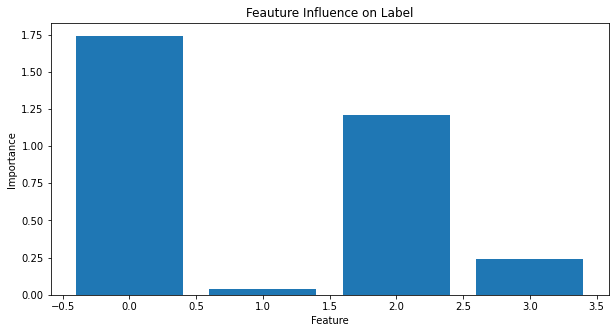

In [ ]:
import matplotlib.pyplot as plt
importance = model.coef_[0]

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feauture Influence on Label')
plt.show()

As we see from the graph here, there are two features that are influencing the predictions from the logisitic regression model.

- **Property Type**
- **Applicant Race**

For a financial institution, it makes sense to decide on loan applications based on the type of property one is needing a loan for. However, it **does not** make sense for a loan application to accept or reject a loan based on an applicant's race. 

Remember that if a feature importance measure is positive, then it predicts class one. So in this case, the applicant's race is influencing the model's prediction of a loan being accepted by the institution. This is't the information we would need to accept the hypothesis for the project, but it is a clear indication of **racial bias** taking place within the HMDA data. If racial bias was *NOT* present, then the applicant's race should have no impact on the model's prediction. Instead, it is one of the leading influencers.

Before wrapping up, let's check some other measurements to examine how the model is performing:

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.01      0.02      1638
           1       0.82      1.00      0.90      7425

    accuracy                           0.82      9063
   macro avg       0.80      0.50      0.46      9063
weighted avg       0.81      0.82      0.74      9063



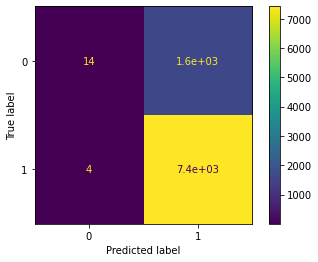

In [ ]:
# check confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)

Both the classification report and the confusion matrix confirm that the model is generalizing well to the test data.